<a href="https://colab.research.google.com/github/garestrear/metodos_numericos/blob/main/M%C3%A9todos_de_b%C3%BAsqueda_de_ra%C3%ADces_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1><center> UNIVERSIDAD NACIONAL DE COLOMBIA </center></h1>
#<h1><center>SEDE MEDELLÍN</center></h1>
#<h1><center>MÉTODOS NUMÉRICOS</center></h1>
##<h1><center>3006907</center></h1>



---


### Desarrollado por:
Andrés Julián Londoño Gómez

Marzo 2021


---



###<h1><center>CAPITULO 1: SOLUCIÓN NUMÉRICA DE ECUACIONES DE UNA VARIABLE</center></h1>
Objetivo: Encontrar las soluciones de f(x)=0 usando métodos iterativos. 

Los métodos numéricos que se desarrollan en este capítulo son:

1. Método de bisección
2. Método iterativo de punto fijo
3. Método de Newton y sus extenciones

    3.1 Newton acelerado

    3.2 Newton modificado




---

Primero importamos las librerias a usar en todo el desarrollo de éste cuaderno.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Ahora definamos una función que nos ayude a graficar nuestras funciones a lo largo del estudio de los métodos numéricos

In [ ]:
# a,b es el intervalo donde voy a graficar mi funcion en el eje x
#c es la cantidad de puntos que queremos graficar entre a y b
# d, e es el intervalo donde voy a graficar mi funcion en el eje y
def graficar(f,a=-10,b=10,c=100,d=-10,e=10,malla=1):
    x = np.linspace(a,b,c)
    y = f(x)
    plt.plot(x,y)
    if malla==1:
        plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(a,b)
    plt.ylim(d,e)




parece una función muy complicada de usar, con tantos parámetros, asi que mas adelante habra un "tutorial".



---
####**1. Método de bisección**

Este método se basa en el teorema del valor intermedio, el método consiste en dividir subintérvalos [ ai , bi ] a la mitad y luego localizar la mitad que contenga la raiz. El proceso se repite hasta cumplir los criterios de parada.



In [ ]:
# Codigo método de bisección
#     f : función, sera definida durante el ejemplo
#     a : límite inferior del intérvalo
#     b : límite superior del intérvalo
#   tol : tolerancia 
#     k : contador de iteraciones
# maxit : número máximo de iteraciones
#     p : aproximación a la raiz

def biseccion(f,a,b,tol):
    # verificamos que en el intérvalo escogido exista una raiz
    if f(a)*f(b) > 0:
        print('No existe una raiz en este intérvalo, también es posible que la gráfica contenga varias raices en [ a, b ] de la '+
            'forma 2n con n=0,1,2,...\n'+ 
            'En otras palabras en [ a ,b ] existe un número par de raices de la función f. Modifica el intervalo [ a , b ]')
    elif f(a)*f(b) < 0:
        # por TVI podemos garantizar que existe una solucion a la ecuacion f(x)=0 en [a,b]
        k = 0 
        maxit = (np.log(abs(b-a)) - np.log(tol))/np.log( 2 ) + 1
        while k <= maxit:  
            p = ( a + b )/2 
            
            if f(p)*f(a) < 0:
                b=p
            elif f(p)*f(b) < 0:
                a=p

            error =abs( b - a )
            k+=1

            if f(p)==0:
                break
        
            #criterios de parada
            if abs(f(p)) < tol and error < tol :
                break
        
        print('La raiz buscada p  : {0:^25.8}\n    f(p) : {1:^47.8}\nNúmero de iteraciones : {2:^10}\nError : {3:^53.8}'.format(p,f(p),k,error))

[link text](https:// [link text](https://))  **Ejemplo para el método de bisección**

tomado de: https://www.slideshare.net/WilliamCharlyCaldero/metodos-numericos-de-la-fisica

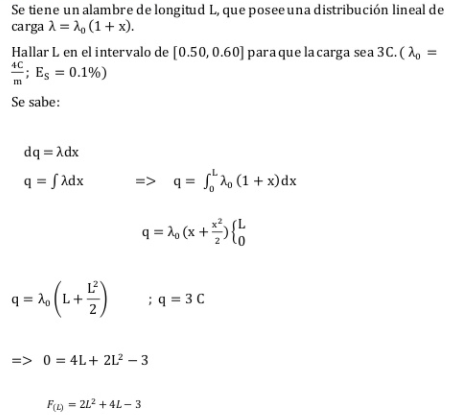

Para hallar la longitud del alambre, debemos encontrar las raices para F(L)

Lo primero es definir la función f y graficarla para ratificar el intérvalo [ a , b ] 

In [ ]:
# definir la función f
def L(L):
    return 2*L**2 + 4*L - 3

Ahora el "tutorial" de nuestra función "graficar".

Modificar los valores a,b,c,d,e de la función "graficar" da una visión mas precisa dependiendo de lo que se desee, aunque no es necesario, podemos trabajar con sus valores predeterminados. Por lo tanto, solo es obligatorio ingresar la función.

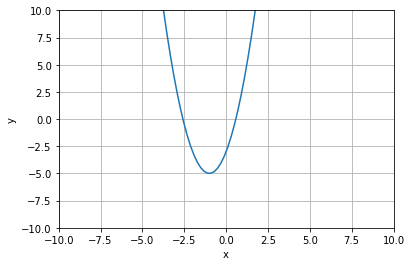

In [ ]:
graficar(L) # por favor python :)

python es todo querido.

Pero la gráfica está muy lejos, así que debemos decirle a python que limite el eje x a un intérvalo más pequeño. Para ello modificamos los valores de a y b

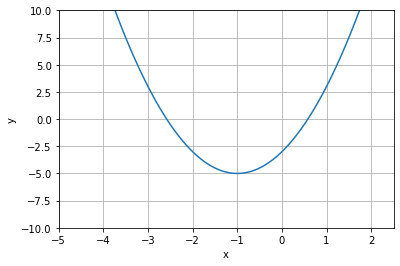

In [ ]:
graficar(L,a=-5,b=2.5)

La linea anterior es equivalente a:

graficar(L , -5 , 2.5 )

Pero si la escribes así, es necesario conservar el orden definido en la función.

Ahora limitemos el intérvalo en el eje y, modificando d y e.

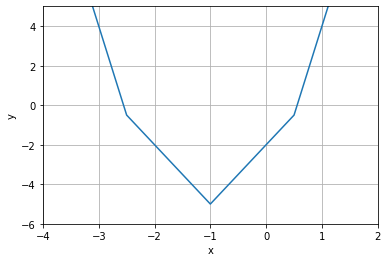

In [ ]:
graficar(L,e=5,a=-4,d=-6,b=2,c=5)

ups!! y que paso? . Pues c es muy pequeño probemos con un c=50.... probamos que llamando los argumentos de está forma el orden no importa.

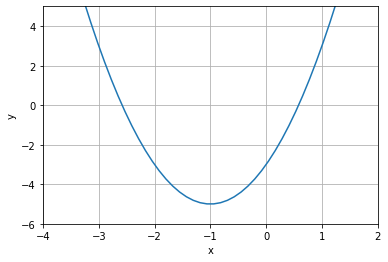

In [ ]:
graficar(L,e=5,a=-4,d=-6,b=2,c=50)

Perfecto : )

Las demas funciones de "graficar" las analizaremos mas adelante.
Ya sabemos gráficar en python, ahora a los métodos numéricos.

Se verifica la existencia de la raiz en el intérvalo [ a , b ]. Sólo falta elegir la tolerancia, para ello asumamos que los errores que son permisibles son de micrómetros, por lo tanto: tol = 0.000001

Ahora a utilizar nuestro primer método numérico.

In [ ]:
tol = 1*10**-6
biseccion(L,0,1,tol)

La raiz buscada p  :        0.58113909        
    f(p) :                  1.6291601e-06                 
Número de iteraciones :     21    
Error :                     4.7683716e-07                    




---

#### **2. Método de punto fijo**

Un número p es un punto fijo para una función g si g(p)=p.

El problema de punto fijo esta relacionado con la búsqueda de raices, de la siguiente manera:

Dado un problema de búsqueda de raiz f(p)=0, podemos definir una función con punto fijo en p.



In [ ]:
# f     : funcion
# p0    : aproximacion  inicial
# tol   : tolerancia
# maxit : cantidad máxima de iteraciones
def punto_fijo(p0,tol,maxit):
    i = 0
    while   i <= maxit:
        p=fp(p0)
        error=abs(p-p0)
        if error < tol :
            break
        p0=p
        i+=1
    print('Aproximación',p0)
    print('Error',error)
    print('cant iteraciones',i)

Utilicemos el codigo con un ejemplo.

Primero debemos comprobar si existe un punto fijo, asi que graficamos la funcion f(x) y la funcion y=x.

Luego definimos la aproximación inicial, la tolerancia y la cantidad máxima de iteraciones.

Malla en "graficar" es útil cuando vamos a gráficar 2 funciones.

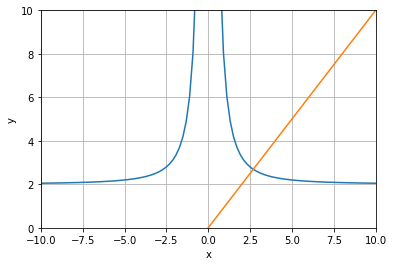

In [ ]:
def fp(z):
    return 5/z**2 +2
def x(x):
    return x
graficar(fp,d=0,malla=0) # si no agregamos el parámetro malla=0 no aparecen las grillas.
graficar(x,d=0)

Ahora estamos seguros de que existen puntos fijos, intentemos encontrar el punto fijo que se encuentra en el intervalo [ 2 , 4]

Aproximación 2.690653887327481
Error 9.745023196394698e-06
cant iteraciones 16


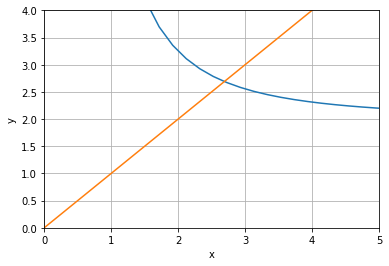

In [ ]:
graficar(fp,malla=0) # si no agregamos el parámetro malla=0 no aparecen las grillas.
graficar(x,d=0,e=4,a=0,b=5) 
p0 = 3
tol = 1*10**(-5)
maxit = 50
punto_fijo(p0,tol,maxit)

Recuerda, siempre puedes limitar mas los intervalos de graficación. Intentalo.



---

#### **3. Método de Newton**







Esté método es uno de los mas poderosos para resolver problemas de encontrar raíces, y es sencillo entender como funciona. Iniciemos con una aproximación a la raiz P0,se evalúa en la función f y se traza una tangente a f en el punto ( P0 , f(P0) ), el punto de corte de la tangente con el eje x es nuestra nueva aproximación, solo resta repetir el proceso.

Escribamos el código.

In [ ]:

def newton(L,dL,P0,maxit,tol):
    i=1
    while i <= maxit:
        p=P0 - L(P0)/dL(P0)
        error = abs(p-P0)
        if error < tol:
            break
        i+=1
        P0=p
    print('Aproximación',P0)
    print('error',error)
    print('Iteraciones',i)

Probemos nuestro código con la función L utilizado en el ejemplo de bisección.

In [ ]:
def dL(L):
    return 4*L + 4 
tol=1*10**-6 # igual que en el ejemplo de bisección
p=0.5
newton(L,dL,p,20,tol)

Aproximación 0.5811388300849211
error 7.314149286230531e-13
Iteraciones 4


Mira el gran poder del método de Newton, solo 4 iteraciones.


#####**3.1 Método de Newton acelerado**

Es muy parecido al Newton normalito, pero nos permite encontrar raíces múltiples mas rápidamente, pero es necesario conocer la múltiplicidad m de la raiz. 

# m > 1 ( m es un número entero).

Para acelerar el método solo debemos multiplicar el segundo elemento de la ecuación de iteración del Newton normalito por m.

In [ ]:

def newton_acel(f, df,P0,m,maxit,tol):
    i=1
    while i <= maxit:
        p=P0 - m*(f(P0)/df(P0)) # <<<-------- Aqui va m
        error = abs(p-P0)
        if error < tol:
            break
        i+=1
        P0=p
    print('Aproximación',P0)
    print('error',error)
    print('Iteraciones',i)

Es importante notar que los códigos de Newton normalito y el Newton acelerado se pueden convertir en uno solo de forma muy sencilla. Intentalo!!


Un ejemplo sencillo.

In [ ]:
def z(x):
    return x**2 -3.12*x + 2.43   # Función con raiz de múltiplicidad 2
def dz(x):
    return 2*(x-2)
m=2
maxit=200
tol = 10**-6
p0 = 1
newton_acel(z,dz,p0,m,maxit,tol)

Aproximación 1.4999962340365163
error 9.038527928328932e-07
Iteraciones 38


Comparemos el resultado con el newton normalito

In [ ]:
newton(z,dz,p0,maxit,tol)

Aproximación 1.499992584699761
error 8.898778176558153e-07
Iteraciones 77


La interaciones con el método acelerado se redujeron a la mitad para este ejemplo sencillito. grandioso.

##### **3.2 Newton modificado**

Este método también es una aceleración del newton normalito pero acá necesitamos la segunda derivada y no necesitamos la múltiplicidad.
Este método tambien es útil cuando tengo raices múltiples. Aunque la ecuación de convergencia se **modifica**.

In [ ]:
def newton_mod(f,df,ddf,P0,maxit,tol):
    i=1
    while i <= maxit:
        p= P0 -  (f(P0)*df(P0)) / ((df(P0))**2 - f(P0)*ddf(P0))
        error = abs(p-P0)
       
        if error < tol:
            break
        i+=1
        P0=p
    print('Aproximación',P0)
    print('error',error)
    print('Iteraciones',i)
   

In [ ]:
 # difinamos la segunda derivada
 def ddz(x):
     return 2


newton_mod(z,dz,ddz,p0,maxit,tol)

Aproximación 1.4999924132604319
error 9.104541494053819e-07
Iteraciones 76




---

---





###<h1><center>CAPITULO 2: Métodos iterativos para resolver problemas de sistemas lineales y no lineales</center></h1>
Encontrar las soluciones del sistema Ax=b 


1. Método de Jacobi
2. Método de Gauss-Seidel
3. Métodos de relajación (SOR)
4. Método de Newton para sistemas no lineales




####**1. Método de Jacobi**


In [ ]:
def jacobi(A,b,x0,tol,maxit=100):
    # vamos a descomponer la matriz A para poder formar la matriz de iteraciones Tj
    # y el vector asociado cj
    D = np.diag(np.diag(A))     # D matriz diagonal
    L = -np.triu(A,1)    # L negativo de la matriz triangular superior
    U = -np.tril(A,-1)   # U negativo de la matriz triangular inferior
    Tj= np.linalg.inv(D)@(L+U)
    cj= np.linalg.inv(D)@b
    i = 1 # i lleva el registro de las iteraciones
    while i <= maxit:
        x = Tj@x0 + cj  # matriz de iteraciones para el método de Jacobi
        error  = np.linalg.norm(x-x0)
        if error < tol:
            break
        i+=1
        x0 = x

    print('Aproximación :',x0)
    print('b calculado  :',A@x0)
    print('b inicial', b)
    print('iteraciones', i)

#### **2. Método de Gauss-Seidel**

El código es muy similar al de jacobi, solo debemos modificar la matriz de iteraciones y el vector asociado.

In [ ]:
def gsel(A,b,x0,tol,maxit=100):
    # vamos a descomponer la matriz A para poder formar la matriz de iteraciones Tj
    # y el vector asociado cj
    D = np.diag(np.diag(A))     # D matriz diagonal
    L = -np.triu(A,1)    # L negativo de la matriz triangular superior
    U = -np.tril(A,-1)   # U negativo de la matriz triangulas inferior
    Tj= np.linalg.inv(D-L)@U
    cj= np.linalg.inv(D-L)@b
    i = 1 # i lleva el registro de las iteraciones
    while i <= maxit:
        x = Tj@x0 + cj  # matriz de iteraciones para el método de Gauss-Seidel
        error  = np.linalg.norm(x-x0)
        if error < tol:  
            break
        i+=1
        x0 = x

    print('Aproximación :',x0)
    print('b calculado  :',A@x0)
    print('b inicial', b)
    print('iteraciones', i)

#### **3. Método SOR**

Para este método introducimos un parámetro  0 < w < 2. w busca reducir la norma del vector de iteración (k+1).

Cuando:

0 < w < 1 --- método de subrelajación

  w > 1   --- método de sobrerelajación

  w = 1   --- método de Gauss-Seidel

In [ ]:
def sor(A,b,x0,tol,maxit=100,w=1):
    # vamos a descomponer la matriz A para poder formar la matriz de iteraciones Tj
    # y el vector asociado cj
    D = np.diag(np.diag(A))     # D matriz diagonal
    L = -np.triu(A,1)    # L negativo de la matriz triangular superior
    U = -np.tril(A,-1)   # U negativo de la matriz triangulas inferior
    Tj= np.linalg.inv(D-w*L)@((1-w)*D+w*U)
    cj= w*np.linalg.inv(D-w*L)@b
    i = 1 # i lleva el registro de las iteraciones
    while i <= maxit:
        x = Tj@x0 + cj  # matriz de iteraciones para el método de SOR
        error  = np.linalg.norm(x-x0)
        if error < tol:  
            break
        i+=1
        x0 = x

    print('Aproximación :',x0)
    print('b calculado  :',A@x0)
    print('b inicial', b)
    print('iteraciones', i) 

Ejemplo

In [ ]:
A = np.array([
            [ 5 , 2 , 1 , 1 ],
            [ 2 , 6 , 2 , 1 ],
            [ 1 , 2 , 7 , 1 ],
            [ 1 , 1 , 2 , 9 ]
])

b = np.array([ 29, 31, 26, 19])
x0 = np.random.rand(4)
tol = 10**-14
jacobi(A,b,x0,tol,maxit=100)
print()
gsel(A,b,x0,tol,maxit=100)
print()
sor(A,b,x0,tol,maxit=100)

Aproximación : [4.00924609 2.96372688 2.17283073 0.85348506]
b calculado  : [29. 31. 26. 19.]
b inicial [29 31 26 19]
iteraciones 89

Aproximación : [4.00924609 2.96372688 2.17283073 0.85348506]
b calculado  : [29. 31. 26. 19.]
b inicial [29 31 26 19]
iteraciones 22

Aproximación : [4.00924609 2.96372688 2.17283073 0.85348506]
b calculado  : [29. 31. 26. 19.]
b inicial [29 31 26 19]
iteraciones 22


En este caso el método de SOR y el de Gauss-Seidel generan la misma cantidad de iteraciones, intenta modificar el parámetro w.

#### **4. Método de Newton para sistemas no lineales**

In [ ]:
#F = función
#JF =jacobiano de la función
#x = aproximación inicial
# maxit = Cantidad máxima de iteraciones
# tol = tolerancia

def nolinsistem(F,JF,x0,maxit,tol):
    i=1
    while i<=maxit:
        det = np.linalg.det(JF(x0))             # aseguremonos que la matriz sea invertible
        if det != 0:
            Jinv = np.linalg.inv(JF(x0))   # cálculo de la inversa
            x=x0-(Jinv @ F(x0))            # ecuación de iteración
            error=np.linalg.norm(x-x0)     
            if error < tol:
                break
            i+=1
            x0=x

        elif i==0:        # si la matriz no es invertible
            print('La matriz no es invertible')
            print('Aproximación :',x0)
            print('Iteraciones', i)
            print('Error', error) 
            break

    print('Aproximación :',x0)
    print('Iteraciones', i)
    print('Error', error)

Ejemplo

In [ ]:
#definamos la función y el jacobiano
def F(x):
    f1=x[0]**2+x[1]**2-1
    f2=4*x[0]**2/9+4*x[1]**2-1
    return np.array([f1,f2])

def JF(x):
    return np.array([[2*x[0] , 2*x[1]], [8*x[0]/9 , 8*x[1]]])

x=([1,1])
maxit=100
tol=10**-15
nolinsistem(F,JF,x,maxit,tol)

Aproximación : [0.91855865 0.39528471]
Iteraciones 7
Error 5.551115123125783e-17
